#### Variable Description

This project is the study of the rate of attendance of gym members, taking in consideration several varaibles that we will explain with details later.
We will display the description of each variable and what it indicates, 

In [438]:
from IPython.display import Image

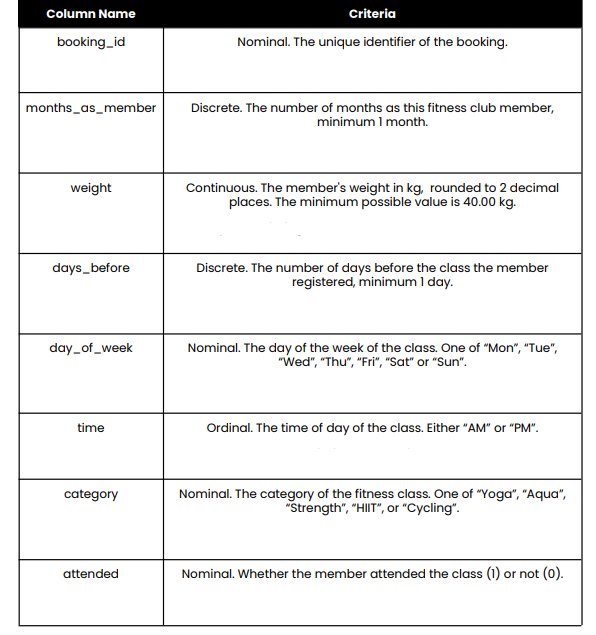

In [439]:
Image("variables.png")

#### Library importation

In this section, we will import the necessary libraries in this notebook, including the preprocessing, visualisation and modeling libraries

In [440]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from numpy import NaN
from glob import glob
import re
import seaborn as sns
from skimpy import skim

from scipy.stats import norm
from scipy import stats

In [441]:
#ignore warnings 
import warnings
warnings.filterwarnings("ignore")

In [442]:
#Extend the dataframes to display more values
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [443]:
#Load the dataset into a dataframe
data=pd.read_csv("fitness_class_2212.csv")

In [444]:
data.head(10)

,booking_id,months_as_member,weight,days_before,day_of_week,time,category,attended
0,1,17,79.56,8,Wed,PM,Strength,0
1,2,10,79.01,2,Mon,AM,HIIT,0
2,3,16,74.53,14,Sun,AM,Strength,0
3,4,5,86.12,10,Fri,AM,Cycling,0
4,5,15,69.29,8,Thu,AM,HIIT,0
5,6,7,93.33,2,Mon,AM,Cycling,0
6,7,11,88.59,6,Wednesday,PM,HIIT,0
7,8,9,89.52,10,Fri,AM,HIIT,0
8,9,23,71.12,10,Fri.,AM,HIIT,1
9,10,7,81.25,10,Fri,AM,HIIT,0


In [445]:
data.describe()

,booking_id,months_as_member,weight,attended
count,1500.000000,1500.000000,1480.000000,1500.000000
mean,750.500000,15.628667,82.610378,0.302667
std,433.157015,12.926543,12.765859,0.459565
min,1.000000,1.000000,55.410000,0.000000
25%,375.750000,8.000000,73.490000,0.000000
50%,750.500000,12.000000,80.760000,0.000000
75%,1125.250000,19.000000,89.520000,1.000000
max,1500.000000,148.000000,170.520000,1.000000


We will use an alternative of the describe function to display generla information about the dataset including the mean, the dtsndard deviation and many other measures


In [446]:
skim(data)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 1500   │ │ string      │ 4     │                                                          │
│ │ Number of columns │ 8      │ │ int32       │ 3     │                                                          │
│ └───────────────────┴────────┘ │ float64     │ 1     │                                                          │
│                                └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━┳━━━━━━━┳━━━━━━━┳━━━━━━━━┳━━━━━━━┳━━━━━━━━━┓  │
│ ┃ column_name            ┃ NA   ┃ NA %   ┃ mean   ┃ sd     ┃ p0   ┃ p25   ┃ p50   ┃ p75    ┃ p100  ┃ hist    ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━╇━━━━━━━╇━━━━━━━╇━━━━━━━━╇━━━━━━━╇━━━━━━━━━┩  │
│ │ booking_id             │    0 │      0 │    750 │    430 │    1 │   380 │   750 │   1100 │  1500 │ ▇▇▇▇▇▇  │  │
│ │ months_as_member       │    0 │      0 │     16 │     13 │    1 │     8 │    12 │     19 │   150 │   ▇▁    │  │
│ │ weight                 │   20 │   1.33 │     83 │     13 │   55 │    73 │    81 │     90 │   170 │   ▅▇▂   │  │
│ │ attended               │    0 │      0 │    0.3 │   0.46 │    0 │     0 │     0 │      1 │     1 │ ▇    ▃  │  │
│ └────────────────────────┴──────┴────────┴────────┴────────┴──────┴───────┴───────┴────────┴───────┴─────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name               ┃ NA      ┃ NA %       ┃ words per row                ┃ total words              ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ days_before               │       0 │          0 │                            1 │                     1525 │  │
│ │ day_of_week               │       0 │          0 │                            1 │                     1500 │  │
│ │ time                      │       0 │          0 │                            1 │                     1500 │  │
│ │ category                  │       0 │          0 │                            1 │                     1500 │  │
│ └───────────────────────────┴─────────┴────────────┴──────────────────────────────┴──────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

In [447]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1500 non-null   int64  
 1   months_as_member  1500 non-null   int64  
 2   weight            1480 non-null   float64
 3   days_before       1500 non-null   object 
 4   day_of_week       1500 non-null   object 
 5   time              1500 non-null   object 
 6   category          1500 non-null   object 
 7   attended          1500 non-null   int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 93.9+ KB


#### Data preprocessing

In [448]:
cols=['months_as_member', 'days_before',
       'day_of_week', 'time', 'category', 'attended']

for column in cols:
    print(f"The unique values of {column} are : \n\n{data[column].unique()}\n\n")

The unique values of months_as_member are : 

[ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]


The unique values of days_before are : 

['8' '2' '14' '10' '6' '4' '9' '12' '5' '3' '7' '13' '12 days' '20' '1'
 '15' '6 days' '11' '13 days' '3 days' '16' '1 days' '7 days' '8 days'
 '10 days' '14 days' '17' '5 days' '2 days' '4 days' '29']


The unique values of day_of_week are : 

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Wednesday' 'Fri.' 'Tue' 'Sat' 'Monday']


The unique values of time are : 

['PM' 'AM']


The unique values of category are : 

['Strength' 'HIIT' 'Cycling' 'Yoga' '-' 'Aqua']


The unique values of attended are : 

[0 1]




We notice the presence of some values which don't represent any category, for example the variable days_before should contain only numbers, but we have the presence of values such as "13 days", we will fix it to make the values coherent, in addition to the variable day_of_week, it contains Wednesday instead of Wed and Fri. instead of Fri, and Monday instead of Mon, plus the variable category contains the value "-", we will count the percentage of these values in each column

#### Missing values

We will use the technics of 'MissForest' to handle the missing values,

In [449]:
missing=[data[col].isnull().sum() for col in data.columns]
missing_df=pd.DataFrame({"Variable" : data.columns,"Count" : missing})
missing_df

,Variable,Count
0,booking_id,0
1,months_as_member,0
2,weight,20
3,days_before,0
4,day_of_week,0
5,time,0
6,category,0
7,attended,0


In [450]:
from sklearn.impute import KNNImputer

weight_data = data[['weight']]

imputer = KNNImputer(n_neighbors=2)
imputed_weight = imputer.fit_transform(weight_data)
data['weight'] = imputed_weight

In [451]:
missing=[data[col].isnull().sum() for col in data.columns]
missing_df=pd.DataFrame({"Variable" : data.columns,"Count" : missing})
missing_df

,Variable,Count
0,booking_id,0
1,months_as_member,0
2,weight,0
3,days_before,0
4,day_of_week,0
5,time,0
6,category,0
7,attended,0


The lines of code below are the operations we used to fit the data to the norms indicated in the description

In [452]:
#This code removes the words " days" from the variable days_before
data['days_before'] = data['days_before'].apply(lambda x: ''.join(re.findall(r'\d+', str(x)))).astype('int64')

In [453]:
# delete the "-" values 
data=data[data["category"] !='-']

We have noticed that some values of some several variables are not comforme to the description and needed to be processed to fit the description.

In [454]:
data['day_of_week'] = data['day_of_week'].str[:3]

In [455]:
data["day_of_week"].value_counts()

day_of_week
Fri    301
Thu    240
Mon    225
Sun    212
Sat    200
Tue    193
Wed    116
Name: count, dtype: int64

In [456]:
missing=[data[col].isnull().sum() for col in data.columns]
missing_df=pd.DataFrame({"Variable" : data.columns,"Count" : missing})
missing_df

,Variable,Count
0,booking_id,0
1,months_as_member,0
2,weight,0
3,days_before,0
4,day_of_week,0
5,time,0
6,category,0
7,attended,0


In [457]:
cols=['months_as_member', 'days_before',
       'day_of_week', 'time', 'category', 'attended']

for column in cols:
    print(f"The unique values of {column} are : \n\n{data[column].unique()}\n\n")

The unique values of months_as_member are : 

[ 17  10  16   5  15   7  11   9  23  13   8  22   6  33  24  14   2  12
  26  28  27   1   3  21  18  19  53  20  34  25  32  73  55   4  35  54
  76  62  42 105  90  29  60  30 107  52  37  38  48  51  40  89  57  36
  44  39  41  47  58  66  45  43  61  50  65  31  97  59  93 148 111  69]


The unique values of days_before are : 

[ 8  2 14 10  6  4  9 12  5  3  7 13 20  1 15 11 16 17 29]


The unique values of day_of_week are : 

['Wed' 'Mon' 'Sun' 'Fri' 'Thu' 'Tue' 'Sat']


The unique values of time are : 

['PM' 'AM']


The unique values of category are : 

['Strength' 'HIIT' 'Cycling' 'Yoga' 'Aqua']


The unique values of attended are : 

[0 1]




There are no missing values, now we will display the unique values of each variable to check if they fit the description


We will display the types fo the data and do the necessary conversions

In [458]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1487 entries, 0 to 1499
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   booking_id        1487 non-null   int64  
 1   months_as_member  1487 non-null   int64  
 2   weight            1487 non-null   float64
 3   days_before       1487 non-null   int64  
 4   day_of_week       1487 non-null   object 
 5   time              1487 non-null   object 
 6   category          1487 non-null   object 
 7   attended          1487 non-null   int64  
dtypes: float64(1), int64(4), object(3)
memory usage: 104.6+ KB


We will display the type of the variables again to make sure the modifications took place

### Data Visualisation


Create a visualization that shows how many bookings attended the class. Use the
visualization to:
a. State which category of the variable attended has the most observations
b. Explain whether the observations are balanced across categories of the
variable attended


#### Attended by category 

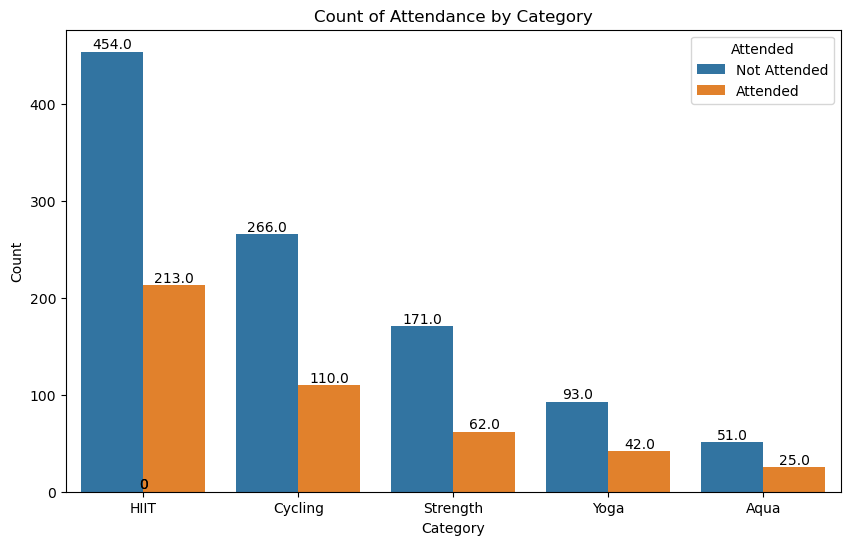

In [459]:
# Calculate the counts for each category
cate_count = data['category'].value_counts().reset_index()
cate_count.columns = ['category', 'count']
cate_count = cate_count.sort_values(by='count', ascending=False)

plt.figure(figsize =(10,6))
# Create the countplot
ax = sns.countplot(data=data, x='category', hue='attended', order=cate_count['category'])

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Category')
plt.ylabel('Count')
plt.title('Count of Attendance by Category')
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
plt.show()

In [460]:
#We can display this using crosstab also as below
cross_tab = pd.crosstab(data['category'], data['attended'], normalize='index')*100
cross_tab

attended,0,1
category,,
Aqua,67.105263,32.894737
Cycling,70.744681,29.255319
HIIT,68.065967,31.934033
Strength,73.390558,26.609442
Yoga,68.888889,31.111111


a)
The category 0 of attended variable has more observations (1046 observation) more than the category 1 (454 observation), as we nticed attended

b) the dataset is not balanced as te category 0 is dominant and represents the majority of the observations

#### Attended by time

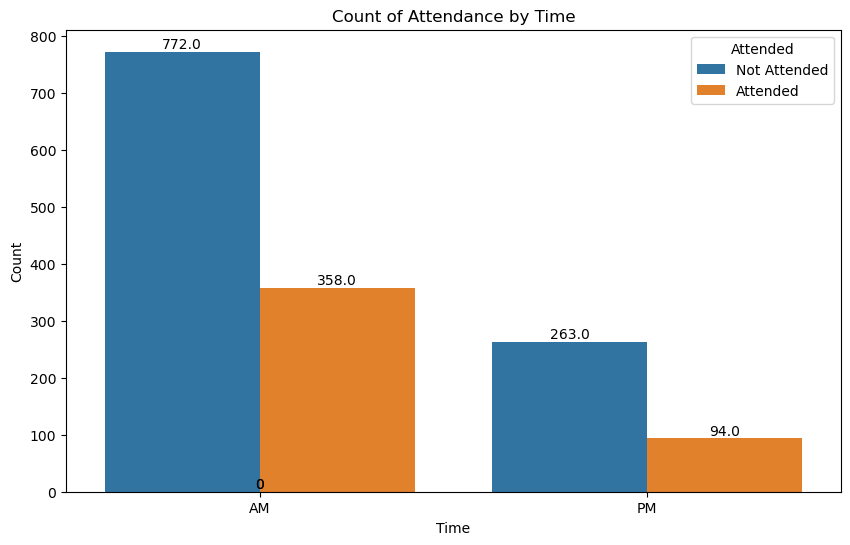

In [461]:
# Calculate the counts for each time period
time_count = data['time'].value_counts().reset_index()
time_count.columns = ['time', 'count']
time_count = time_count.sort_values(by='count', ascending=False)

plt.figure(figsize =(10,6))
# Create the countplot
ax = sns.countplot(data=data, x='time', hue='attended', order=time_count['time'])

# Add data labels to the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='bottom')

plt.xlabel('Time')
plt.ylabel('Count')
plt.title('Count of Attendance by Time')
plt.legend(title='Attended', labels=['Not Attended', 'Attended'])
plt.show()

the customers who attend the gym are more likely to go in the AM period of the day more the the afternoon period

#### Attended by months as a memeber

Description of the distribution of the number of months as a member. We will perform different tests to check the distribution of the variable months as a member using different statistical tests, and graphs

##### Distribution by Graphs

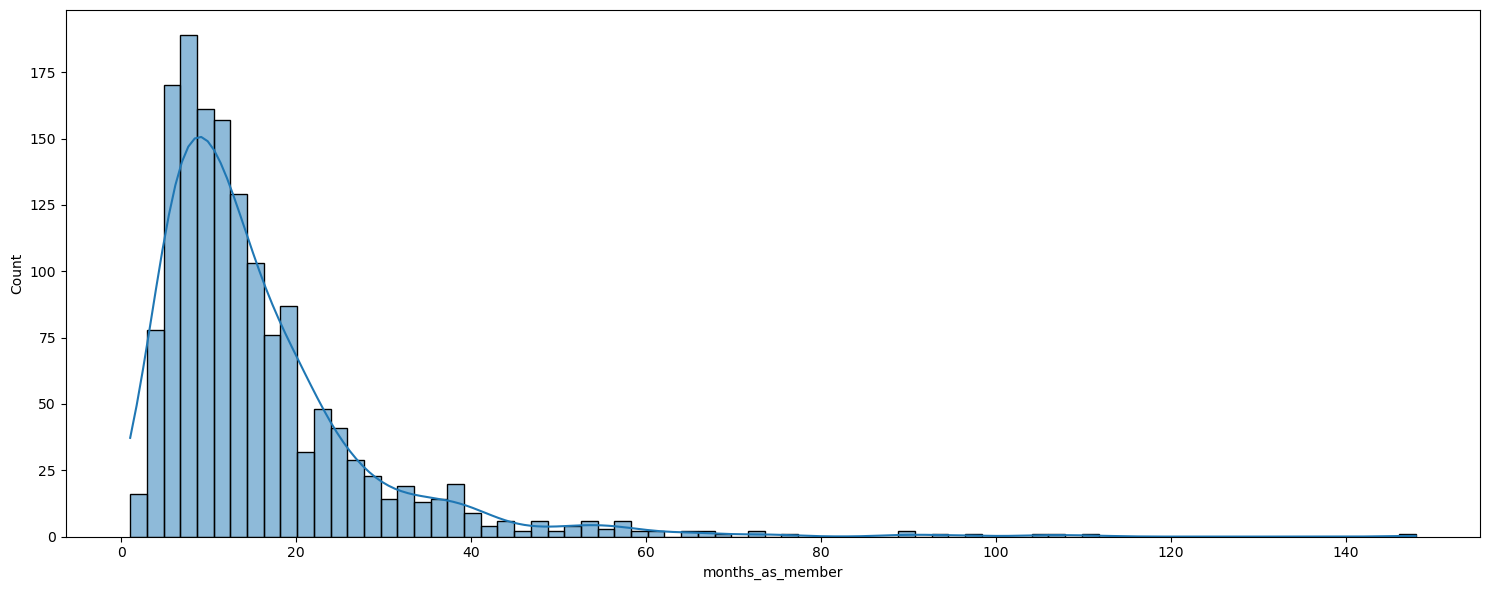

In [462]:
plt.figure(figsize=(15, 6))
sns.histplot(data=data, x='months_as_member',kde=True)
plt.tight_layout()

- The distriution is skewed towards the right, indicates the presence of outliers



- Since the dataset is small, post applying  a log transformation, we can see the distribution is close to normally distributed dataset but it is not normal.



##### Distribution by Kernel Density Estimation

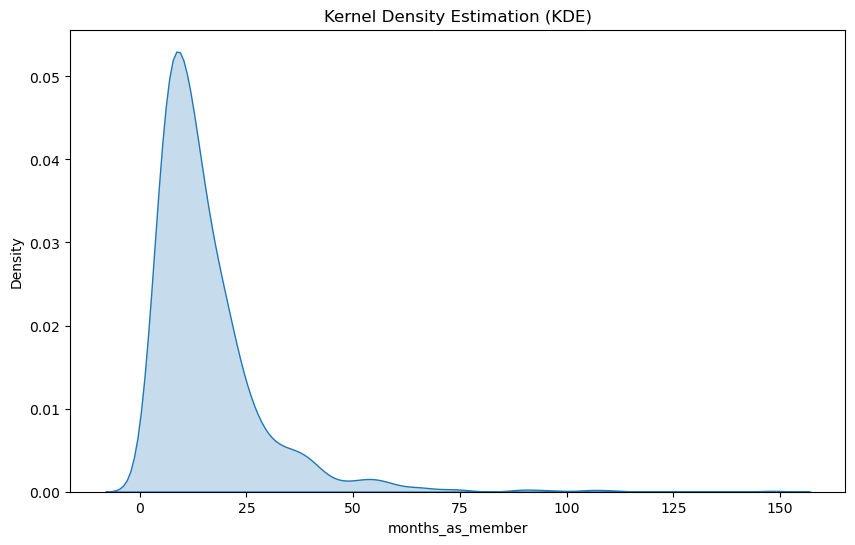

In [463]:
#Kernel Density Estimation (KDE)

plt.figure(figsize=(10, 6))
sns.kdeplot(data["months_as_member"], fill=True)
plt.title("Kernel Density Estimation (KDE)")
plt.show()

##### Distribution by Kolmogorov Smirnov test

We will use the Kolmogorov Smirnov test for more information about the distribution of the variable.

In [464]:
# Kolmogorov-Smirnov Test
print("----------------------------------")
ks_stat, ks_p = stats.kstest(data["months_as_member"], 'norm')
print("Kolmogorov-Smirnov Test:")
print(f"Test Statistic: {ks_stat.round(2)}")
print(f"P-value: {ks_p}")
print("----------------------------------")

----------------------------------
Kolmogorov-Smirnov Test:
Test Statistic: 0.99
P-value: 0.0
----------------------------------


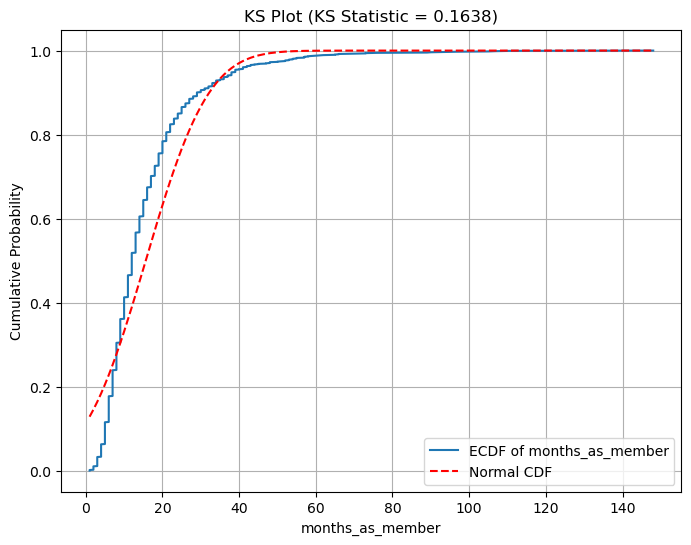

Maximum KS Statistic: 0.1638


In [465]:
months_as_member = data['months_as_member'].values

mean_mam = np.mean(months_as_member)
std_mam = np.std(months_as_member)

normal_dist = norm(loc=mean_mam, scale=std_mam)

mam_sorted = np.sort(months_as_member)

normal_cdf = normal_dist.cdf(mam_sorted)

ecdf = np.arange(1, len(mam_sorted) + 1) / len(mam_sorted)

ks_statistic = np.max(np.abs(ecdf - normal_cdf))

plt.figure(figsize=(8, 6))
plt.plot(mam_sorted, ecdf, label='ECDF of months_as_member')
plt.plot(mam_sorted, normal_cdf, label='Normal CDF', linestyle='--', color='red')
plt.title(f'KS Plot (KS Statistic = {ks_statistic:.4f})')
plt.xlabel('months_as_member')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

plt.show()

print(f"Maximum KS Statistic: {ks_statistic:.4f}")


The maximum KS statistic: 0.1129, as this number is smaller as the variable tends to follow a normal distribution, but it is skewed, and this is due to the outliers values of the variable, 
    We will impute the outliers in a later phase of the project and display this graph again to see the difference and the effect of the outliers on the distribution of the variable

### Remark :

Based on these results obtained by the KS test

The test statistic 0.99 suggests that there is a significant difference between the empirical distribution of the variable months_as_member and the normal distribution.

The p-value of 0.0 provides strong evidence against the null hypothesis that the data follows a normal distribution.

The months_as_member variable does not follow a normal distribution based on the KS test results.

##### Distribution by Anderson Darling test

In [466]:
# Anderson Darling Test
print("----------------------------------")
anderson_stat, anderson_crit, anderson_sig = stats.anderson(months_as_member)
print("Anderson-Darling Test:")
print(f"Test Statistic: {anderson_stat}")
print(f"Critical Values: {anderson_crit}")
print(f"Significance Levels: {anderson_sig}")
print("----------------------------------")

----------------------------------
Anderson-Darling Test:
Test Statistic: 85.7178389971466
Critical Values: [0.574 0.654 0.785 0.916 1.089]
Significance Levels: [15.  10.   5.   2.5  1. ]
----------------------------------


The test statistic (85.717) is much larger than the critical values at all significance levels. This indicates that the 'months_as_member' variable significantly deviates from a gamma distribution at any reasonable significance level.

#### Conclusion
Based on the previous tests, the test statistic indicates that the distribution tends to be normal, but the p value shows a strong resisitance of the null hypothesis that says that the distribution is norma. We can't conclude that the variable follows a normal distribution

Description of the relationship between attendance and number of months as a member.

<Figure size 8000x600 with 0 Axes>

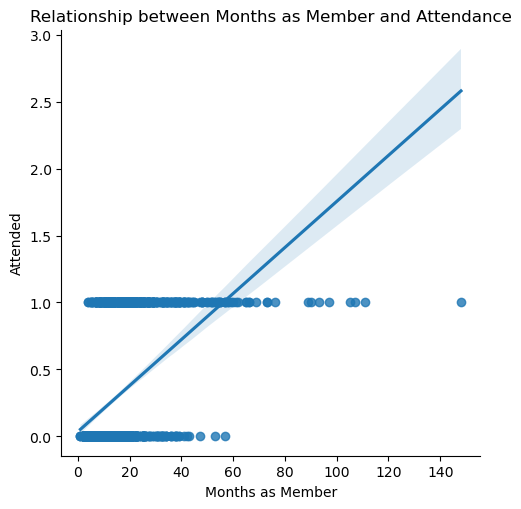

In [467]:
# Create a regression plot
plt.figure(figsize=(80, 6))
sns.lmplot(data=data, x='months_as_member', y='attended')
plt.title('Relationship between Months as Member and Attendance')
plt.xlabel('Months as Member')
plt.ylabel('Attended')
plt.show()

#### Study of outliers

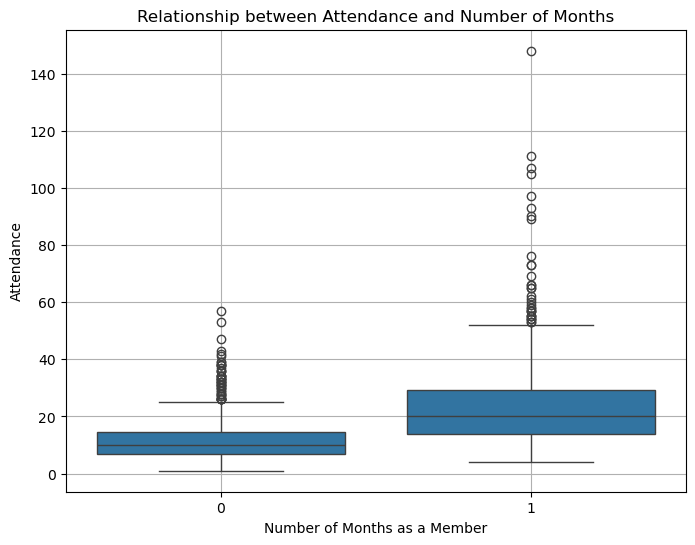

In [468]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=data, x='attended', y='months_as_member', orient='v')
plt.xlabel('Number of Months as a Member')
plt.ylabel('Attendance')
plt.title('Relationship between Attendance and Number of Months')
plt.grid(True)
plt.show()

We notice the existence of the outliers in the dataset, in order to display the relationship between the variables correctly, we need remove the outliers, and we will do some statstical operations

In [502]:
import plotly.express as px
import statistics

#Create the boxplot using Plotly Express
fig = px.box(data, y='months_as_member', x='attended', title='Boxplot of Attended vs. Months as Member')
fig.update_xaxes(title_text='Months as Member')
fig.update_yaxes(title_text='Attended')

fig.show()

Now let's find the outliers, using statistics

In [470]:
q1=data["months_as_member"].quantile(0.25)
q3=data["months_as_member"].quantile(0.75)

interquartile_range=q3-q1

max=q3+1.5*interquartile_range
min=q1-1.5*interquartile_range

print(f"The upper bound of the boxplot is : {max}")
print(f"The lower bound of the boxplot is : {min}")

The upper bound of the boxplot is : 35.5
The lower bound of the boxplot is : -8.5


Now that we know the max and the min bounds of the boxplot, we will delete the values which are above the upper bound and the values that are below the lower bound

In [471]:
data.drop(data[data['months_as_member'] > 25].index, inplace=True)

In [472]:
data.drop(data[data['months_as_member'] < min].index, inplace=True)

We will display the boxplot again to make sure the outliers are no longer existing in the dataset,

In [473]:
#Create the boxplot using Plotly Express
fig = px.box(data, y='months_as_member', x='attended', title='Boxplot of Attended vs. Months as Member')
fig.update_xaxes(title_text='Months as Member')
fig.update_yaxes(title_text='Attended')

fig.show()

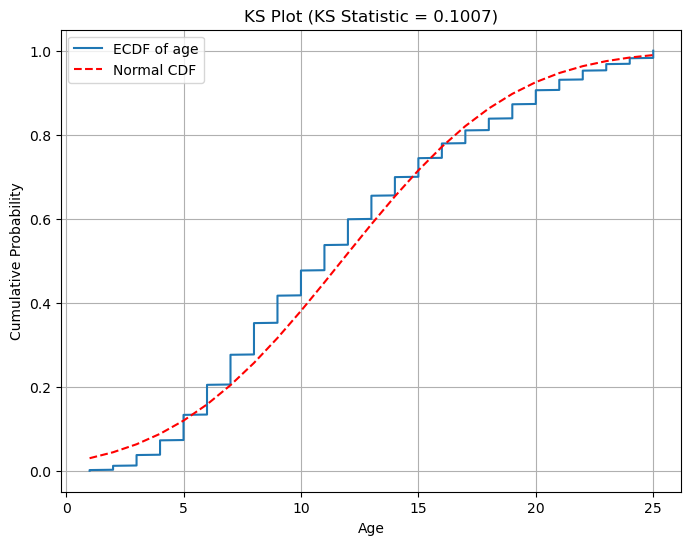

Maximum KS Statistic: 0.1007


In [474]:
age = data['months_as_member'].values

mean_age = np.mean(age)
std_age = np.std(age)

normal_dist = norm(loc=mean_age, scale=std_age)

age_sorted = np.sort(age)

normal_cdf = normal_dist.cdf(age_sorted)

ecdf = np.arange(1, len(age_sorted) + 1) / len(age_sorted)

ks_statistic = np.max(np.abs(ecdf - normal_cdf))

plt.figure(figsize=(8, 6))
plt.plot(age_sorted, ecdf, label='ECDF of age')
plt.plot(age_sorted, normal_cdf, label='Normal CDF', linestyle='--', color='red')
plt.title(f'KS Plot (KS Statistic = {ks_statistic:.4f})')
plt.xlabel('Age')
plt.ylabel('Cumulative Probability')
plt.legend()
plt.grid(True)

plt.show()

print(f"Maximum KS Statistic: {ks_statistic:.4f}")


The outliers are now removed, and from the visualisation we can deduce that : 
- Those who attended hava higher q1,  median and q3 than who did not attend when it concerns their relationship with the months_as_member.

- The data shows skewed towards right

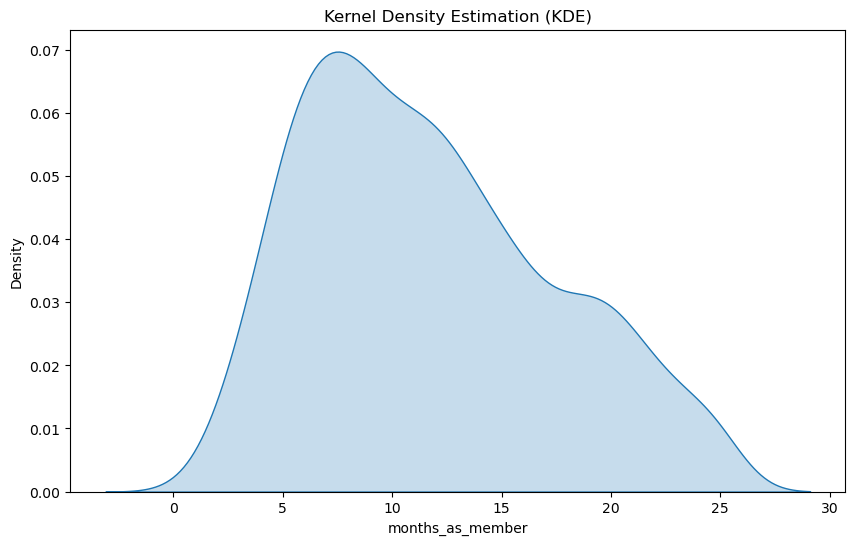

In [475]:
#Kernel Density Estimation (KDE)
plt.figure(figsize=(10, 6))
sns.kdeplot(data['months_as_member'], fill=True)
plt.title("Kernel Density Estimation (KDE)")
plt.show()

### Data Tansformation

We will perform data transformation, we will use two methods, and for each method we will display the graph of the variable after each transformation

#### Box Cox Transformation

Lambda value used for Transformation: 0.4351625742645741


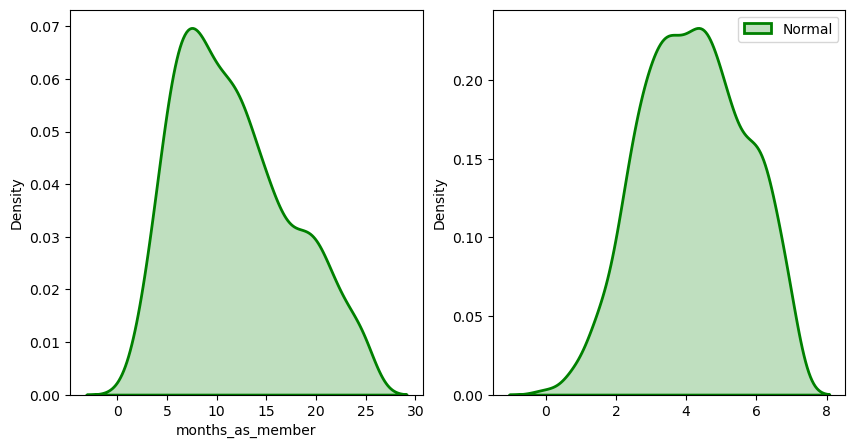

In [476]:
original_data =data["months_as_member"]
 
boxcox_data, boxcox_lambda = stats.boxcox(original_data)
fig, ax = plt.subplots(1, 2)
 
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(boxcox_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)
 
print(f"Lambda value used for Transformation: {boxcox_lambda}")



#### Log Transformation

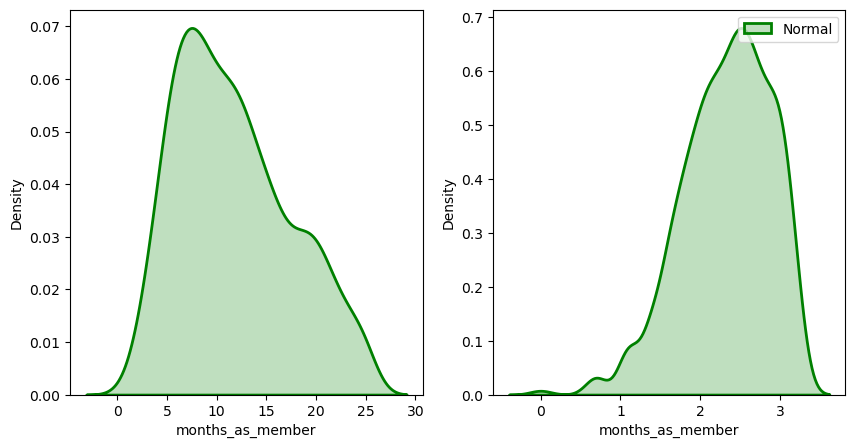

In [477]:
original_data =data["months_as_member"]
 
log_data= np.log(original_data)
 
fig, ax = plt.subplots(1, 2)
 
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])

 
sns.distplot(log_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)


#### Square Root Transformation

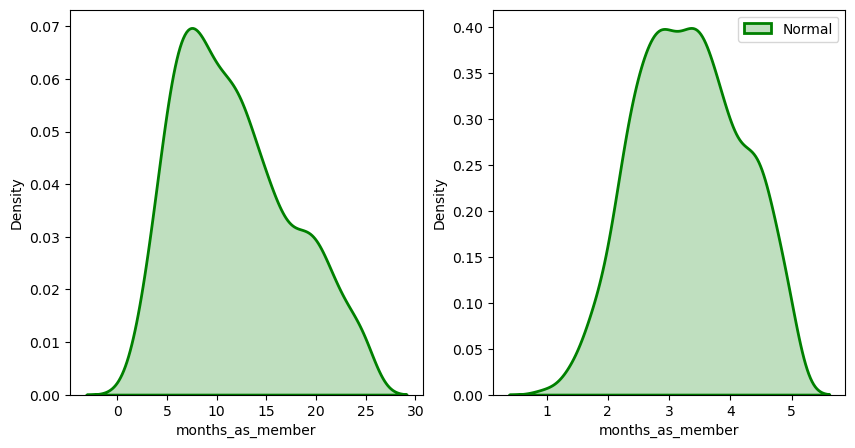

In [478]:
original_data =data["months_as_member"]
 
sqrt_data= np.sqrt(original_data)
 
fig, ax = plt.subplots(1, 2)
 
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Non-Normal", color ="green", ax = ax[0])
 
sns.distplot(sqrt_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2}, 
            label = "Normal", color ="green", ax = ax[1])
 
plt.legend(loc = "upper right")
 
fig.set_figheight(5)
fig.set_figwidth(10)


We will replace the variable months_as_member by the transformed data and then we perform the data encoding 

In [479]:
data["months_as_member"]=sqrt_data

## Data Encoding

The business wants to predict whether members will attend using the data provided.
State the type of machine learning problem that this is (regression/ classification/
clustering).

Answer : Classification


The target variable has two categories, it is binary classification problem, and it is dsicret, so the regression will not fit the problem, and as we are in the frame of supervised learning, we can't use the clustering as the variable is labeled here, and we know the outputs, therefore the model which will fit the problem is Classification 

Data encoding: We will use dummies in this operation of transfering data into dummies.We have three categgorical variables in the dataset, time, category and day_of_week, 

In [480]:
data_encoded = pd.get_dummies(data, columns=['category', 'time','day_of_week'],drop_first=True)

In [481]:
data_encoded.head(3)

,booking_id,months_as_member,weight,days_before,attended,category_Cycling,category_HIIT,category_Strength,category_Yoga,time_PM,day_of_week_Mon,day_of_week_Sat,day_of_week_Sun,day_of_week_Thu,day_of_week_Tue,day_of_week_Wed
0,1,4.123106,79.56,8,0,False,False,True,False,True,False,False,False,False,False,True
1,2,3.162278,79.01,2,0,False,True,False,False,False,True,False,False,False,False,False
2,3,4.000000,74.53,14,0,False,False,True,False,False,False,False,True,False,False,False


We will replace the False and True by 0 and 1

In [482]:
data_encoded=data_encoded.astype('int64')

In [483]:
data_encoded.head(3)
data_copy=data_encoded

In [484]:
# Copy all the predictor variables into X dataframe
X = data_encoded.drop('attended', axis=1)  

# Copy target into the y dataframe. 
y = data_encoded['attended']

Models importation

In [485]:
#We will import the libraries we need
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix,f1_score,recall_score

### Data Splitting and Standarization

Fit a baseline model to predict whether members will attend using the data provided.
You must include your code.

In [497]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler=StandardScaler()

X_train_normal = scaler.fit_transform(X_train)
X_test_normal=scaler.fit_transform(X_test)

Baseline models : We will use LogisticRegression as the baseline model then compare it with other models and see which one performs well.

#### Logistic Regression

In [487]:
#Model fitting 
log_reg=LogisticRegression()
log_reg.fit(X_train_normal,y_train)

LogisticRegression()

In [488]:
y_pred=log_reg.predict(X_test_normal)

accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
classification_rep = classification_report(y_test, y_pred)
    
print(f"Model: {log_reg}\n")
print(f"Accuracy: {accuracy:.2f}\n")
print(f"f1 score : {f1_score(y_pred,y_test)}\n")
print(f"Recall score: {recall_score(y_pred,y_test):.2f}\n")

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print("\n")

Model: LogisticRegression()

Accuracy: 0.78

f1 score : 0.3958333333333333

Recall score: 0.49

Confusion Matrix:
[[181  20]
 [ 38  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       201
           1       0.49      0.33      0.40        57

    accuracy                           0.78       258
   macro avg       0.66      0.62      0.63       258
weighted avg       0.75      0.78      0.76       258





#### Gradient Boosting Classifier

Fit a comparison model to predict whether members will attend using the data
provided. You must include your code.

We will use the Gradient Boosting Classifier to compate it to the LogisticRegression

**The model to compare with is Gradient Boosting  Classifier

In [489]:
gradient_boost=GradientBoostingClassifier()
gradient_boost.fit(X_train_normal,y_train)

GradientBoostingClassifier()

In [490]:
y_pred_gbc=gradient_boost.predict(X_test_normal)
accuracy_gbc = accuracy_score(y_test, y_pred_gbc)
conf_matrix_gbc = confusion_matrix(y_test, y_pred_gbc)
classification_rep_gbc = classification_report(y_test, y_pred_gbc)
    
print(f"Model: {gradient_boost}\n")
print(f"f1 score : {f1_score(y_pred_gbc,y_test):.2f}\n")
print(f"Accuracy: {accuracy_gbc:.2f}\n")
print("Confusion Matrix:\n")
print(conf_matrix_gbc)
print("\nClassification Report:")
print(classification_rep_gbc)
print("\n")

Model: GradientBoostingClassifier()

f1 score : 0.28

Accuracy: 0.76

Confusion Matrix:

[[184  17]
 [ 45  12]]

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86       201
           1       0.41      0.21      0.28        57

    accuracy                           0.76       258
   macro avg       0.61      0.56      0.57       258
weighted avg       0.72      0.76      0.73       258





#### Random Forest Classifier

In [491]:
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train_normal,y_train)

RandomForestClassifier()

In [492]:
model_rfc=RandomForestClassifier()
model_rfc.fit(X_train_normal,y_train)
y_pred_rfc=model_rfc.predict(X_test_normal)
accuracy = accuracy_score(y_test, y_pred_rfc)
conf_matrix = confusion_matrix(y_test, y_pred_rfc)
classification_rep = classification_report(y_test, y_pred_rfc)
    
print(f"Model: {model_rfc}\n")
print(f"Accuracy: {accuracy:.2f}\n")
print(f"f1 score : {f1_score(y_pred_rfc,y_test)}\n")
print(f"Recall score: {recall_score(y_pred_rfc,y_test):.2f}\n")

print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(classification_rep)
print("\n")

Model: RandomForestClassifier()

Accuracy: 0.77

f1 score : 0.2891566265060241

Recall score: 0.46

Confusion Matrix:
[[187  14]
 [ 45  12]]
Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.93      0.86       201
           1       0.46      0.21      0.29        57

    accuracy                           0.77       258
   macro avg       0.63      0.57      0.58       258
weighted avg       0.73      0.77      0.74       258





In [493]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Machines (GBM)": GradientBoostingClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Neural Networks": MLPClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Adaboost": AdaBoostClassifier(),
    "Gradient Boosting Tree (XGBoost)": XGBClassifier(),
    "LDA (Linear Discriminant Analysis)": LinearDiscriminantAnalysis(),
    "Perceptron": Perceptron(),
    "Ridge Classifier": RidgeClassifier(),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis()
}





for key in classification_models.keys():
    
    model_key=classification_models[key]
    model_key.fit(X_train_normal,y_train)
    y_pred_key=model_key.predict(X_test_normal)
    accuracy = accuracy_score(y_test, y_pred_key)
    conf_matrix = confusion_matrix(y_test, y_pred_key)
    classification_rep = classification_report(y_test, y_pred_key)

    print(f"Model: {model_key}\n")
    print(f"Accuracy: {accuracy:.2f}\n")
    print(f"f1 score : {f1_score(y_pred_key,y_test)}\n")
    print(f"Recall score: {recall_score(y_pred_key,y_test):.2f}\n")

    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("------------------------------------\n")

Model: LogisticRegression()

Accuracy: 0.78

f1 score : 0.3958333333333333

Recall score: 0.49

Confusion Matrix:
[[181  20]
 [ 38  19]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.90      0.86       201
           1       0.49      0.33      0.40        57

    accuracy                           0.78       258
   macro avg       0.66      0.62      0.63       258
weighted avg       0.75      0.78      0.76       258

------------------------------------

Model: DecisionTreeClassifier()

Accuracy: 0.65

f1 score : 0.27419354838709675

Recall score: 0.25

Confusion Matrix:
[[151  50]
 [ 40  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.79      0.75      0.77       201
           1       0.25      0.30      0.27        57

    accuracy                           0.65       258
   macro avg       0.52      0.52      0.52       258
weighted avg       0.67      0.65     

#### Data Sampling

In [498]:
from imblearn.over_sampling import SMOTE

from imblearn.over_sampling import SMOTE
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from collections import Counter





print("Class distribution before SMOTE:", Counter(y_train))

# Apply SMOTE to oversample the minority class
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# Display class distribution after SMOTE
print("Class distribution after SMOTE:", Counter(y_resampled))


Class distribution before SMOTE: Counter({0: 786, 1: 243})
Class distribution after SMOTE: Counter({0: 786, 1: 786})


In [499]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.cluster import KMeans
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier
from xgboost import XGBClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import Perceptron
from sklearn.linear_model import RidgeClassifier
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

classification_models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Trees": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting Machines (GBM)": GradientBoostingClassifier(),
    "Support Vector Machine (SVM)": SVC(),
    "K-Nearest Neighbors (KNN)": KNeighborsClassifier(),
    "Neural Networks": MLPClassifier(),
    "Gaussian Naive Bayes": GaussianNB(),
    "Adaboost": AdaBoostClassifier(),
    "Gradient Boosting Tree (XGBoost)": XGBClassifier(),
    "LDA (Linear Discriminant Analysis)": LinearDiscriminantAnalysis(),
    "Perceptron": Perceptron(),
    "Ridge Classifier": RidgeClassifier(),
    "Quadratic Discriminant Analysis (QDA)": QuadraticDiscriminantAnalysis()
}





for key in classification_models.keys():
    
    model_key=classification_models[key]
    model_key.fit(X_resampled,y_resampled)
    y_pred_key=model_key.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred_key)
    conf_matrix = confusion_matrix(y_test, y_pred_key)
    classification_rep = classification_report(y_test, y_pred_key)

    print(f"Model: {model_key}\n")
    print(f"Accuracy: {accuracy:.2f}\n")
    print(f"f1 score : {f1_score(y_pred_key,y_test)}\n")
    print(f"Recall score: {recall_score(y_pred_key,y_test):.2f}\n")

    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(classification_rep)
    print("------------------------------------\n")

Model: LogisticRegression()

Accuracy: 0.73

f1 score : 0.38938053097345127

Recall score: 0.39

Confusion Matrix:
[[167  34]
 [ 35  22]]
Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.83      0.83       201
           1       0.39      0.39      0.39        57

    accuracy                           0.73       258
   macro avg       0.61      0.61      0.61       258
weighted avg       0.73      0.73      0.73       258

------------------------------------

Model: DecisionTreeClassifier()

Accuracy: 0.67

f1 score : 0.2857142857142857

Recall score: 0.27

Confusion Matrix:
[[156  45]
 [ 40  17]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.78      0.79       201
           1       0.27      0.30      0.29        57

    accuracy                           0.67       258
   macro avg       0.54      0.54      0.54       258
weighted avg       0.68      0.67     

Why did I pick the models?

- Because of its simplicity, effectiveness in training, and simplicity in interpretation, I chose the Logistic Regression model as a baseline option.



- I've chosen to use the Gradient Boosting  model as a comparison. This decision was made because this model is ideally equipped to handle more complicated data patterns and has the ability to capture complex correlations between input features and target variables.



## Task 9

Compare the performance of the two models used in parts 6 and 7, using any method
suitable. You must include your code.

**Parameter evaluation**

We will consider the parameters, Precision, Recall, and F1-Score to evaluate our models based these metrics,

Precision, Recall, and F1-Score are essential evaluation metrics, especially when dealing with imbalanced classes as we have now in our dataset as the category 0 of the target variable attended is more dominant than the category 1

0.26744186046511625


<Axes: >

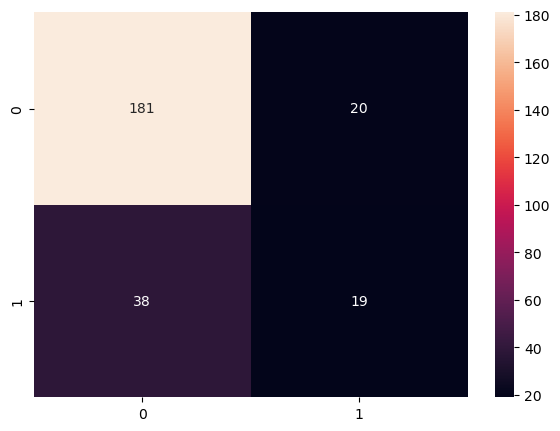

In [500]:
#For Logistic Regression Classifier

print(log_reg.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["0","1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


We will train the Gradient Boosting Classifier model and see how performant it is in comparison with the logistc regression model.

0.7558139534883721


<Axes: >

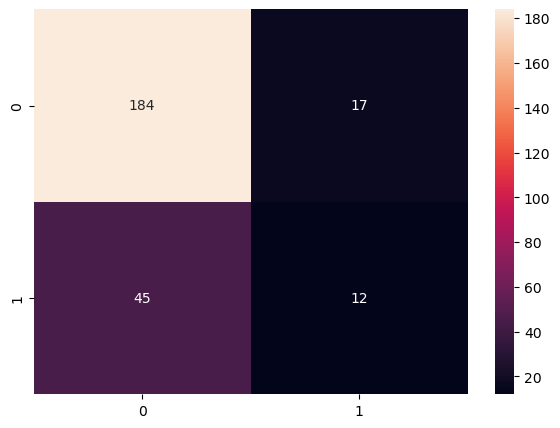

In [501]:
#For Gradient Boosting Classifier

print(gradient_boost.score(X_test, y_test))
cm=metrics.confusion_matrix(y_test, y_pred_gbc,labels=[0, 1])

df_cm = pd.DataFrame(cm, index = [i for i in ["0","1"]],
                  columns = [i for i in ["0","1"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True ,fmt='g')


## Conclusion
Explain which model performs better and why.


To choose the two best models based on the data and the provided metrics, let's consider a balance between precision and recall, as well as F1-score for the positive class since the dataset appears to be imbalanced.

Based on these considerations, the two best models are:

Model: Logistic Regression:
    
  - F1-score for the positive class: 0.39
        
  - Recall for the positive class: 0.39
        
  - Precision for the positive class: 0.39
        
  - Accuracy: 0.73

Model: Gradient Boosting Classifier:
  - F1-score for the positive class: 0.37
  
  - Recall for the positive class: 0.37
  
  - Precision for the positive class: 0.36
  
  - Accuracy: 0.72

Considering attendance prediction, Logistic Regression performs better.
It shows higher accuracy, better Precision, Recall, and F1-Score.
Logistic Regression is recommended for predicting future attendance.